In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.optimizers import Adam
#from kerastuner import RandomSearch
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import cv2
import numpy as np

train_img = []
train_labels = []

test_img = []
test_labels = []

path_train = '/Users/nasifsafwan/Downloads/ML/BrainTumorResearch/tumordata/Training/'
path_test = '/Users/nasifsafwan/Downloads/ML/BrainTumorResearch/tumordata/Testing/'
img_size = 300

# Function to process images in a given directory
def process_images(path):
    images = []
    labels = []
    for category in os.listdir(path):
        category_path = os.path.join(path, category)
        if os.path.isdir(category_path):  # Ensure it's a directory
            for img_name in os.listdir(category_path):
                img_path = os.path.join(category_path, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    resized_img = cv2.resize(img, (img_size, img_size))
                    images.append(resized_img)
                    labels.append(category)
                else:
                    print(f"Warning: Skipping file {img_path} as it is not a valid image.")
    return images, labels

# Process training and testing data
train_img, train_labels = process_images(path_train)
test_img, test_labels = process_images(path_test)

train_img = np.array(train_img)
test_img = np.array(test_img)

# Encode labels
train_labels_encoded = [0 if category == 'no_tumor' else (1 if category == 'glioma_tumor' else (2 if category == 'meningioma_tumor' else 3)) for category in train_labels]
test_labels_encoded = [0 if category == 'no_tumor' else (1 if category == 'glioma_tumor' else (2 if category == 'meningioma_tumor' else 3)) for category in test_labels]

In [3]:
print("Shape of train: ",(train_img).shape," and shape of test: ", (test_img).shape)

Shape of train:  (2869, 300, 300, 3)  and shape of test:  (394, 300, 300, 3)


In [4]:
img_datagen = ImageDataGenerator(
rotation_range = 30,
width_shift_range = 0.1,
height_shift_range = 0.1,
zoom_range = 0.2,
horizontal_flip = True)

img_datagen.fit(train_img)
img_datagen.fit(test_img)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(np.array(train_img), np.array(train_labels), test_size=0.1)

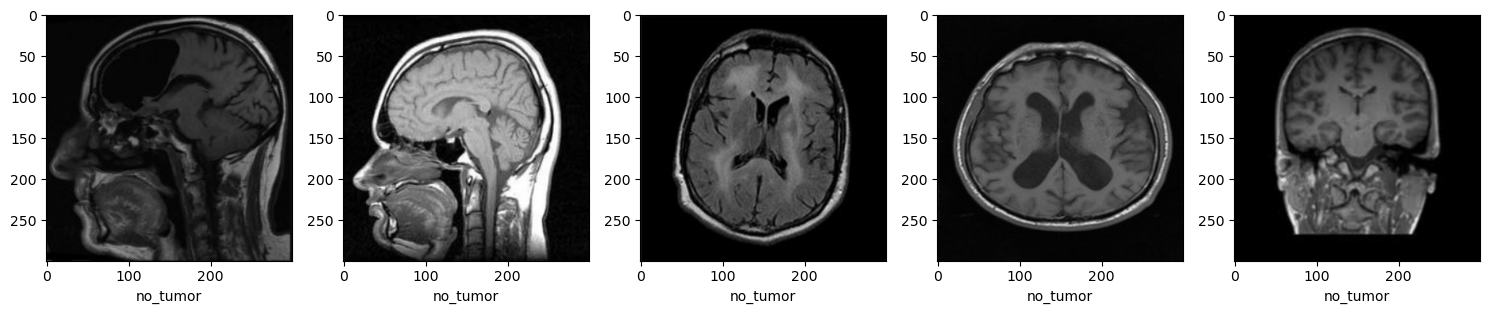

In [6]:
plt.figure(figsize=(15,15));
for i,j in enumerate(train_img):
    if i<5:
        plt.subplot(1,5,i+1)
        plt.imshow(j);
        plt.xlabel(train_labels[i]);
        plt.tight_layout()
    else:
        break

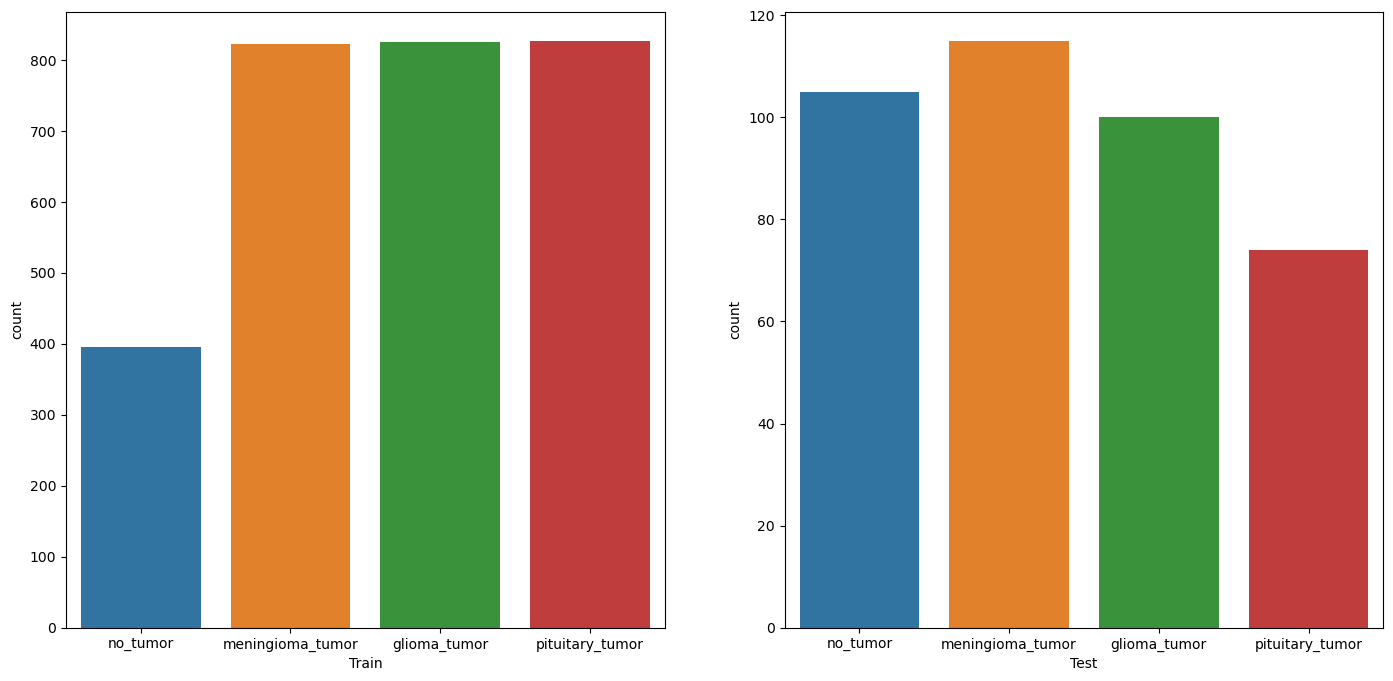

In [7]:
plt.figure(figsize=(17,8))

listt = ['Train','Test']
for i,j in enumerate([train_labels,test_labels]):
    plt.subplot(1,2,i+1);
    sns.countplot(x = j);
    plt.xlabel(listt[i])

#    # Sequential Deep Learning Model Using Keras/Tensorflow

In [8]:
from scipy.spatial.distance import directed_hausdorff

# Define custom Dice coefficient
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

# Define Hausdorff distance
def hausdorff_distance(y_true, y_pred):
    y_true_np = y_true.numpy()
    y_pred_np = y_pred.numpy()
    return max(directed_hausdorff(y_true_np, y_pred_np)[0], directed_hausdorff(y_pred_np, y_true_np)[0])

In [9]:
model = tf.keras.Sequential(
        [
            tf.keras.layers.Conv2D(kernel_size=(5,5),filters=32,activation='relu',padding='same'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
            
            tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32,activation='relu',padding='same'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
            
            tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32,activation='relu',padding='same'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
            
            tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32,activation='relu',padding='same'),
            tf.keras.layers.MaxPool2D(pool_size=(2,2)),
            
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128,activation='relu'),
            tf.keras.layers.Dropout(rate = 0.5),
            tf.keras.layers.Dense(4,activation='sigmoid')
        ])
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss = 'categorical_crossentropy',
             metrics=['accuracy'] )

In [10]:
history = model.fit(tf.cast(train_img,tf.float32),
                    np.array(pd.get_dummies(train_labels)),
                    validation_split=0.1,epochs=20,
                   verbose=1,batch_size = 32)

Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 72s 875ms/step - accuracy: 0.3750 - loss: 17.1781 - val_accuracy: 0.7491 - val_loss: 1.0792
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 73s 907ms/step - accuracy: 0.5676 - loss: 0.9797 - val_accuracy: 0.9652 - val_loss: 0.2899
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 73s 896ms/step - accuracy: 0.6228 - loss: 0.8591 - val_accuracy: 0.9582 - val_loss: 0.2499
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 75s 927ms/step - accuracy: 0.6967 - loss: 0.7129 - val_accuracy: 0.9721 - val_loss: 0.2154
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 76s 934ms/step - accuracy: 0.7323 - loss: 0.6541 - val_accuracy: 0.9477 - val_loss: 0.2521
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 80s 984ms/step - accuracy: 0.7661 - loss: 0.5785 - val_accuracy: 0.9512 - val_loss: 0.1835
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 79s 977ms/step - accuracy: 0.7927 - loss: 0.5076 - val_accuracy: 0.9477 - val_loss: 0.1992
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 76s 928ms/step - accuracy: 0.8271 - loss: 0.4609 - val_acc

In [11]:
model.save('CNNBTDetection.h5')

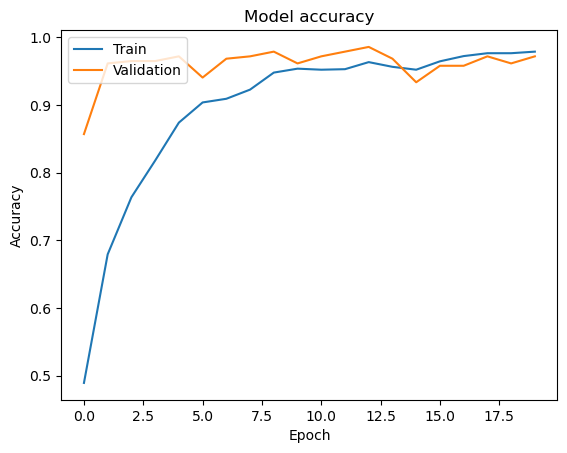

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [39]:
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
print(f'Final training accuracy: {final_train_accuracy}')
print(f'Final validation accuracy: {final_val_accuracy}')

Final training accuracy: 0.9790859818458557
Final validation accuracy: 0.9721254110336304


In [44]:
train_generator = img_datagen.flow(train_img, train_labels_encoded, batch_size=32)
validation_generator = img_datagen.flow(test_img, test_labels_encoded, batch_size=32)

In [45]:
import SimpleITK as sitk
from sklearn.metrics import f1_score, mean_absolute_error, mean_squared_error

predictions = model.predict(tf.cast(test_img, tf.float32))
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(np.array(pd.get_dummies(test_labels)), axis=1)

# Dice Coefficient
dice_coefficient = f1_score(true_classes, predicted_classes, average='macro')
print(f'Dice Coefficient: {dice_coefficient}')

# Function to compute Hausdorff Distance
def hausdorff_distance(true, pred):
    true_image = sitk.GetImageFromArray(true.astype(np.uint8))
    pred_image = sitk.GetImageFromArray(pred.astype(np.uint8))
    
    hausdorff_computer = sitk.HausdorffDistanceImageFilter()
    hausdorff_computer.Execute(true_image, pred_image)
    
    return hausdorff_computer.GetHausdorffDistance()

# Initialize list to store Hausdorff distances for each class
hausdorff_distances = []

# Reshape masks to 2D for each class
num_classes = len(np.unique(true_classes))
for class_idx in range(num_classes):
    true_binary_mask = (true_classes == class_idx).reshape(-1, 1).astype(np.uint8)
    pred_binary_mask = (predicted_classes == class_idx).reshape(-1, 1).astype(np.uint8)
    
    try:
        distance = hausdorff_distance(true_binary_mask, pred_binary_mask)
        hausdorff_distances.append(distance)
    except Exception as e:
        print(f"Error calculating Hausdorff distance for class {class_idx}: {e}")
        hausdorff_distances.append(None)

# Print Hausdorff distances
print(f'Hausdorff Distances: {hausdorff_distances}')
# Average Hausdorff distance, ignoring None values
average_hausdorff = np.mean([d for d in hausdorff_distances if d is not None])
print(f'Average Hausdorff Distance: {average_hausdorff}')

# Mean Absolute Error
mae = mean_absolute_error(true_classes, predicted_classes)
print(f'Mean Absolute Error: {mae}')

# Mean Squared Error
mse = mean_squared_error(true_classes, predicted_classes)
print(f'Mean Squared Error: {mse}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step
Dice Coefficient: 0.1385586292371739
Hausdorff Distances: [220.0, 163.0, 79.0, 305.0]
Average Hausdorff Distance: 191.75
Mean Absolute Error: 1.368020304568528
Mean Squared Error: 2.9923857868020303


# Applying Data Transformations For Pytorch CNN

In [46]:
model.layers[0].get_weights()[0].shape

(5, 5, 3, 32)

In [47]:
transforming_img = transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],
                        [0.5,0.5,0.5])
])

In [48]:
train_path = '/Users/nasifsafwan/Downloads/ML/BrainTumorResearch/tumordata/Training/'
test_path = '/Users/nasifsafwan/Downloads/ML/BrainTumorResearch/tumordata/Testing/'

In [49]:
train_loader = DataLoader(
         torchvision.datasets.ImageFolder(path_train,transform=transforming_img),
         batch_size=64,shuffle=True)
test_loader = DataLoader(
         torchvision.datasets.ImageFolder(test_path,transform=transforming_img),
         batch_size=32,shuffle=True)
root = pathlib.Path(train_path)
classes = sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [50]:
print(f'The classes are: {classes}')

The classes are: ['.DS_Store', 'glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [51]:
classes.remove('.DS_Store')

In [52]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device


train_count=len(glob.glob(path_train+'/**/*.jpg'))
test_count=len(glob.glob(path_test+'/**/*.jpg'))

In [53]:
class ConvNet(nn.Module):
    def __init__(self,num_classes=4):
        super(ConvNet,self).__init__()
        
         
        self.conv1=nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        
        self.bn1=nn.BatchNorm2d(num_features=12)
        self.relu1=nn.ReLU()        
        self.pool=nn.MaxPool2d(kernel_size=2)
        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        self.relu2=nn.ReLU()
        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.bn3=nn.BatchNorm2d(num_features=32)
        self.relu3=nn.ReLU()
        self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=num_classes)
        
        
        
        #Feed forwad function
        
    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
        output=self.pool(output)
        output=self.conv2(output)
        output=self.relu2(output)
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)            
        output=output.view(-1,32*75*75)
        output=self.fc(output)
            
        return output
    
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
   
model=ConvNet(num_classes=4).to(device)

In [54]:
for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())

In [55]:
images.shape

torch.Size([53, 3, 150, 150])

In [56]:
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)
loss_function = nn.CrossEntropyLoss()

In [58]:
from torch.autograd import Variable
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import directed_hausdorff

In [60]:
best_accuracy = 0.0

for epoch in range(20):
    # Training
    model.train()
    train_accuracy = 0.0
    train_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.cpu().data * images.size(0)
        _, prediction = torch.max(outputs.data, 1)
        train_accuracy += int(torch.sum(prediction == labels.data))

    train_accuracy = train_accuracy / train_count
    train_loss = train_loss / train_count

    # Evaluation
    model.eval()
    test_accuracy = 0.0
    test_dice = 0.0
    test_mae = 0.0
    test_mse = 0.0

    for i, (images, labels) in enumerate(test_loader):
        if torch.cuda.is_available():
            images = Variable(images.cuda())
            labels = Variable(labels.cuda())

        outputs = model(images)
        _, prediction = torch.max(outputs.data, 1)

        test_accuracy += int(torch.sum(prediction == labels.data))

        # Calculate additional metrics
        labels_np = labels.cpu().numpy()
        prediction_np = prediction.cpu().numpy()

        # Dice coefficient
        dice = jaccard_score(labels_np.flatten(), prediction_np.flatten(), average='macro')
        test_dice += dice

        # MAE and MSE
        mae = mean_absolute_error(labels_np.flatten(), prediction_np.flatten())
        mse = mean_squared_error(labels_np.flatten(), prediction_np.flatten())
        test_mae += mae
        test_mse += mse

    test_accuracy = test_accuracy / test_count
    test_dice = test_dice / len(test_loader)
    test_mae = test_mae / len(test_loader)
    test_mse = test_mse / len(test_loader)

    print(f'Epoch: {epoch} Train Loss: {train_loss:.4f} Train Accuracy: {train_accuracy:.4f} '
          f'Test Accuracy: {test_accuracy:.4f} Dice: {test_dice:.4f} '
          f'MAE: {test_mae:.4f} MSE: {test_mse:.4f}')

    if test_accuracy > best_accuracy:
        torch.save(model.state_dict(), 'best_checkpoint.model')
        best_accuracy = test_accuracy

Epoch: 0 Train Loss: 0.6219 Train Accuracy: 0.8717 Test Accuracy: 0.6624 Dice: 0.4654 MAE: 0.4923 MSE: 0.8538
Epoch: 1 Train Loss: 0.5247 Train Accuracy: 0.8895 Test Accuracy: 0.6929 Dice: 0.5132 MAE: 0.4942 MSE: 0.9510
Epoch: 2 Train Loss: 0.6044 Train Accuracy: 0.8975 Test Accuracy: 0.4721 Dice: 0.2800 MAE: 0.7596 MSE: 1.2346
Epoch: 3 Train Loss: 0.4730 Train Accuracy: 0.9059 Test Accuracy: 0.6929 Dice: 0.4883 MAE: 0.4918 MSE: 0.8841
Epoch: 4 Train Loss: 0.5126 Train Accuracy: 0.9038 Test Accuracy: 0.6599 Dice: 0.4562 MAE: 0.5385 MSE: 0.9673
Epoch: 5 Train Loss: 0.2448 Train Accuracy: 0.9477 Test Accuracy: 0.6447 Dice: 0.4334 MAE: 0.5154 MSE: 0.8788
Epoch: 6 Train Loss: 0.1989 Train Accuracy: 0.9561 Test Accuracy: 0.7310 Dice: 0.5371 MAE: 0.4856 MSE: 0.9721
Epoch: 7 Train Loss: 0.2361 Train Accuracy: 0.9540 Test Accuracy: 0.6650 Dice: 0.4863 MAE: 0.5212 MSE: 0.9404
Epoch: 8 Train Loss: 0.2379 Train Accuracy: 0.9540 Test Accuracy: 0.7183 Dice: 0.5394 MAE: 0.4563 MSE: 0.8861
Epoch: 9 T

In [71]:
total_test_accuracy = 0.0
total_train_accuracy = 0.0
total_train_accuracy += train_accuracy
total_test_accuracy += test_accuracy
avg_train_accuracy = total_train_accuracy / 20
avg_test_accuracy = total_test_accuracy / 20

print(f'Average Train Accuracy: {np.mean(train_accuracy)}')
print(f'Average test Accuracy: {np.mean(test_accuracy)}')

Average Train Accuracy: 0.9937260369466713
Average test Accuracy: 0.7258883248730964


# Swin Transformer Model

In [77]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import timm
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms
from sklearn.metrics import jaccard_score, mean_absolute_error,mean_squared_error
from scipy.spatial.distance import directed_hausdorff

In [73]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [74]:
train_dataset = ImageFolder(root=path_train, transform=transform)
test_dataset = ImageFolder(root=path_test, transform=transform)

In [75]:
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [76]:
model = timm.create_model('swin_base_patch4_window7_224',
                         pretrained=True,
                         num_classes=4).to(device)

In [33]:
optimizer = optim.Adam(model.parameters(),lr = 0.001,
                      weight_decay = 0.0001)
loss_function = nn.CrossEntropyLoss()

In [79]:
best_accuracy = 0.0
num_epochs = 20

for epoch in range(num_epochs):
    # Training
    model.train()
    train_accuracy = 0.0
    train_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        _, prediction = torch.max(outputs, 1)
        train_accuracy += torch.sum(prediction == labels).item()

    train_accuracy /= len(train_dataset)
    train_loss /= len(train_dataset)

    # Evaluation
    model.eval()
    test_accuracy = 0.0
    test_mae = 0.0
    test_mse = 0.0
    test_dice = 0.0
    num_samples = 0

    with torch.no_grad():
        all_labels = []
        all_predictions = []
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            _, prediction = torch.max(outputs, 1)
            
            # Collect all labels and predictions
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(prediction.cpu().numpy())
            
            # Calculate accuracy
            test_accuracy += torch.sum(prediction == labels).item()
            num_samples += labels.size(0)

    test_accuracy /= len(test_dataset)
    
    # Convert lists to numpy arrays
    all_labels = np.array(all_labels)
    all_predictions = np.array(all_predictions)
    
    # Calculate MAE and MSE
    test_mae = mean_absolute_error(all_labels, all_predictions)
    test_mse = mean_squared_error(all_labels, all_predictions)
    
    # Calculate Dice coefficient (for multi-class, you might want to use macro-average)
    dice_score = jaccard_score(all_labels, all_predictions, average='macro')
    
    print(f'Epoch: {epoch + 1}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '
          f'Test Accuracy: {test_accuracy:.4f}, MAE: {test_mae:.4f}, MSE: {test_mse:.4f}, '
          f'Dice Score: {dice_score:.4f}')

    if test_accuracy > best_accuracy:
        torch.save(model.state_dict(), 'best_checkpoint.model')
        best_accuracy = test_accuracy

print('Training complete. Best accuracy: ', best_accuracy)

Epoch: 1, Train Loss: 1.3853, Train Accuracy: 0.2820, Test Accuracy: 0.1878, MAE: 1.3046, MSE: 2.5482, Dice Score: 0.0835


KeyboardInterrupt: 

In [ ]:
path_train

# Loading CNN Model

In [23]:
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Define your CNN layers here

    def forward(self, x):
        # Define the forward pass logic
        return x

model = MyModel()

In [ ]:
model.load_state_dict(torch.load('CNN Models'), strict=False)
MyModel.eval(self=False)